In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\user\Desktop\M5/sales_train_evaluation.csv")
data.shape

(30490, 1947)

30490 rows ce qui correspond à 10*3049 donc 10 stores * 3049 produits   
on va le verifier :

In [3]:
data['store_id'].value_counts().size

10

In [4]:
data['item_id'].value_counts().size

3049

# 1. Exploratory Data Analysis

## Objectif :
- Comprendre du mieux possible nos données 
- Faire le lien entre ce dataset et les 2 autres fournis

## Checklist de base
#### Analyse de Forme :
- **variable target** : on a pas de target ici, en tt cas pas pour le moment, pas avant d avoir rassembler nos datasets
- **lignes et colonnes** : (30490, 1947) soit 10 magasins * 3049 items
- **types de variables** : qualitatives : 6, quantitatives : 1941
- **Analyse des valeurs manquantes** :
    - y en a pas ! on considere pas les 0 des ventes comme des valeurs manquantes mais juste 0 vente
    
## Analyse plus détaillée

- **Relation Variables / Variables** :
  - on peut pas dire que ya une corrélation entre nos variables vu que c des ventes d articles differents.
  - on s'interresse de pres à chaque article et on somme la vente séparemment qu'on va noter dans une nouvelle colonne 'Sum_of_d_row'. De la on pourra voir les meilleurs ventes et les moins bonnes
  
   **les mauvais** : 16579
   **les moyens** : 11037
   **les bons** :  2859
   
   - il est vrai qu'on a fait une segmentation arbitraire qui pourrait ne pas tenir compte du valeur du produit. on a crée des clusters de [0 - 1000] [1001 - 5000] et [5001 et +].
   - nous devons tenir compte du prix de l'article, en effet un article cher ou de luxe se vendra forcement moins qu'un article bon marché ou de premiere necessité ! on verra tout ca quand on "merge" nos datasets 

In [5]:
data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [6]:
data.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,2,0,5,4,0,2,2,5,1


In [7]:
data.columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)

<AxesSubplot:ylabel='None'>

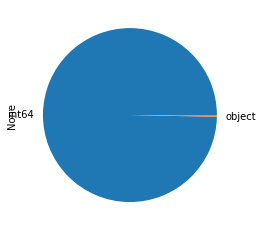

In [8]:
data.dtypes.value_counts().plot.pie()

Notre dataset est composé essentiellement de Integer

In [10]:
print("Groups in DataFrame:")
groups = data.groupby(['store_id', 'item_id']).size().groupby(level=1)
for group_key, group_value in groups:
    group = groups.get_group(group_key)
    print(group)
    print("")

Groups in DataFrame:
store_id  item_id    
CA_1      FOODS_1_001    1
CA_2      FOODS_1_001    1
CA_3      FOODS_1_001    1
CA_4      FOODS_1_001    1
TX_1      FOODS_1_001    1
TX_2      FOODS_1_001    1
TX_3      FOODS_1_001    1
WI_1      FOODS_1_001    1
WI_2      FOODS_1_001    1
WI_3      FOODS_1_001    1
dtype: int64

store_id  item_id    
CA_1      FOODS_1_002    1
CA_2      FOODS_1_002    1
CA_3      FOODS_1_002    1
CA_4      FOODS_1_002    1
TX_1      FOODS_1_002    1
TX_2      FOODS_1_002    1
TX_3      FOODS_1_002    1
WI_1      FOODS_1_002    1
WI_2      FOODS_1_002    1
WI_3      FOODS_1_002    1
dtype: int64

store_id  item_id    
CA_1      FOODS_1_003    1
CA_2      FOODS_1_003    1
CA_3      FOODS_1_003    1
CA_4      FOODS_1_003    1
TX_1      FOODS_1_003    1
TX_2      FOODS_1_003    1
TX_3      FOODS_1_003    1
WI_1      FOODS_1_003    1
WI_2      FOODS_1_003    1
WI_3      FOODS_1_003    1
dtype: int64

store_id  item_id    
CA_1      FOODS_1_004    1
CA_2      FO

dtype: int64

store_id  item_id    
CA_1      FOODS_1_140    1
CA_2      FOODS_1_140    1
CA_3      FOODS_1_140    1
CA_4      FOODS_1_140    1
TX_1      FOODS_1_140    1
TX_2      FOODS_1_140    1
TX_3      FOODS_1_140    1
WI_1      FOODS_1_140    1
WI_2      FOODS_1_140    1
WI_3      FOODS_1_140    1
dtype: int64

store_id  item_id    
CA_1      FOODS_1_141    1
CA_2      FOODS_1_141    1
CA_3      FOODS_1_141    1
CA_4      FOODS_1_141    1
TX_1      FOODS_1_141    1
TX_2      FOODS_1_141    1
TX_3      FOODS_1_141    1
WI_1      FOODS_1_141    1
WI_2      FOODS_1_141    1
WI_3      FOODS_1_141    1
dtype: int64

store_id  item_id    
CA_1      FOODS_1_142    1
CA_2      FOODS_1_142    1
CA_3      FOODS_1_142    1
CA_4      FOODS_1_142    1
TX_1      FOODS_1_142    1
TX_2      FOODS_1_142    1
TX_3      FOODS_1_142    1
WI_1      FOODS_1_142    1
WI_2      FOODS_1_142    1
WI_3      FOODS_1_142    1
dtype: int64

store_id  item_id    
CA_1      FOODS_1_143    1
CA_2      FOODS_1_1

dtype: int64

store_id  item_id    
CA_1      FOODS_2_041    1
CA_2      FOODS_2_041    1
CA_3      FOODS_2_041    1
CA_4      FOODS_2_041    1
TX_1      FOODS_2_041    1
TX_2      FOODS_2_041    1
TX_3      FOODS_2_041    1
WI_1      FOODS_2_041    1
WI_2      FOODS_2_041    1
WI_3      FOODS_2_041    1
dtype: int64

store_id  item_id    
CA_1      FOODS_2_042    1
CA_2      FOODS_2_042    1
CA_3      FOODS_2_042    1
CA_4      FOODS_2_042    1
TX_1      FOODS_2_042    1
TX_2      FOODS_2_042    1
TX_3      FOODS_2_042    1
WI_1      FOODS_2_042    1
WI_2      FOODS_2_042    1
WI_3      FOODS_2_042    1
dtype: int64

store_id  item_id    
CA_1      FOODS_2_043    1
CA_2      FOODS_2_043    1
CA_3      FOODS_2_043    1
CA_4      FOODS_2_043    1
TX_1      FOODS_2_043    1
TX_2      FOODS_2_043    1
TX_3      FOODS_2_043    1
WI_1      FOODS_2_043    1
WI_2      FOODS_2_043    1
WI_3      FOODS_2_043    1
dtype: int64

store_id  item_id    
CA_1      FOODS_2_044    1
CA_2      FOODS_2_0

dtype: int64

store_id  item_id    
CA_1      FOODS_2_223    1
CA_2      FOODS_2_223    1
CA_3      FOODS_2_223    1
CA_4      FOODS_2_223    1
TX_1      FOODS_2_223    1
TX_2      FOODS_2_223    1
TX_3      FOODS_2_223    1
WI_1      FOODS_2_223    1
WI_2      FOODS_2_223    1
WI_3      FOODS_2_223    1
dtype: int64

store_id  item_id    
CA_1      FOODS_2_224    1
CA_2      FOODS_2_224    1
CA_3      FOODS_2_224    1
CA_4      FOODS_2_224    1
TX_1      FOODS_2_224    1
TX_2      FOODS_2_224    1
TX_3      FOODS_2_224    1
WI_1      FOODS_2_224    1
WI_2      FOODS_2_224    1
WI_3      FOODS_2_224    1
dtype: int64

store_id  item_id    
CA_1      FOODS_2_225    1
CA_2      FOODS_2_225    1
CA_3      FOODS_2_225    1
CA_4      FOODS_2_225    1
TX_1      FOODS_2_225    1
TX_2      FOODS_2_225    1
TX_3      FOODS_2_225    1
WI_1      FOODS_2_225    1
WI_2      FOODS_2_225    1
WI_3      FOODS_2_225    1
dtype: int64

store_id  item_id    
CA_1      FOODS_2_226    1
CA_2      FOODS_2_2

dtype: int64

store_id  item_id    
CA_1      FOODS_3_062    1
CA_2      FOODS_3_062    1
CA_3      FOODS_3_062    1
CA_4      FOODS_3_062    1
TX_1      FOODS_3_062    1
TX_2      FOODS_3_062    1
TX_3      FOODS_3_062    1
WI_1      FOODS_3_062    1
WI_2      FOODS_3_062    1
WI_3      FOODS_3_062    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_063    1
CA_2      FOODS_3_063    1
CA_3      FOODS_3_063    1
CA_4      FOODS_3_063    1
TX_1      FOODS_3_063    1
TX_2      FOODS_3_063    1
TX_3      FOODS_3_063    1
WI_1      FOODS_3_063    1
WI_2      FOODS_3_063    1
WI_3      FOODS_3_063    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_064    1
CA_2      FOODS_3_064    1
CA_3      FOODS_3_064    1
CA_4      FOODS_3_064    1
TX_1      FOODS_3_064    1
TX_2      FOODS_3_064    1
TX_3      FOODS_3_064    1
WI_1      FOODS_3_064    1
WI_2      FOODS_3_064    1
WI_3      FOODS_3_064    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_065    1
CA_2      FOODS_3_0

dtype: int64

store_id  item_id    
CA_1      FOODS_3_275    1
CA_2      FOODS_3_275    1
CA_3      FOODS_3_275    1
CA_4      FOODS_3_275    1
TX_1      FOODS_3_275    1
TX_2      FOODS_3_275    1
TX_3      FOODS_3_275    1
WI_1      FOODS_3_275    1
WI_2      FOODS_3_275    1
WI_3      FOODS_3_275    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_276    1
CA_2      FOODS_3_276    1
CA_3      FOODS_3_276    1
CA_4      FOODS_3_276    1
TX_1      FOODS_3_276    1
TX_2      FOODS_3_276    1
TX_3      FOODS_3_276    1
WI_1      FOODS_3_276    1
WI_2      FOODS_3_276    1
WI_3      FOODS_3_276    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_277    1
CA_2      FOODS_3_277    1
CA_3      FOODS_3_277    1
CA_4      FOODS_3_277    1
TX_1      FOODS_3_277    1
TX_2      FOODS_3_277    1
TX_3      FOODS_3_277    1
WI_1      FOODS_3_277    1
WI_2      FOODS_3_277    1
WI_3      FOODS_3_277    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_278    1
CA_2      FOODS_3_2

dtype: int64

store_id  item_id    
CA_1      FOODS_3_498    1
CA_2      FOODS_3_498    1
CA_3      FOODS_3_498    1
CA_4      FOODS_3_498    1
TX_1      FOODS_3_498    1
TX_2      FOODS_3_498    1
TX_3      FOODS_3_498    1
WI_1      FOODS_3_498    1
WI_2      FOODS_3_498    1
WI_3      FOODS_3_498    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_499    1
CA_2      FOODS_3_499    1
CA_3      FOODS_3_499    1
CA_4      FOODS_3_499    1
TX_1      FOODS_3_499    1
TX_2      FOODS_3_499    1
TX_3      FOODS_3_499    1
WI_1      FOODS_3_499    1
WI_2      FOODS_3_499    1
WI_3      FOODS_3_499    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_500    1
CA_2      FOODS_3_500    1
CA_3      FOODS_3_500    1
CA_4      FOODS_3_500    1
TX_1      FOODS_3_500    1
TX_2      FOODS_3_500    1
TX_3      FOODS_3_500    1
WI_1      FOODS_3_500    1
WI_2      FOODS_3_500    1
WI_3      FOODS_3_500    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_501    1
CA_2      FOODS_3_5

store_id  item_id    
CA_1      FOODS_3_749    1
CA_2      FOODS_3_749    1
CA_3      FOODS_3_749    1
CA_4      FOODS_3_749    1
TX_1      FOODS_3_749    1
TX_2      FOODS_3_749    1
TX_3      FOODS_3_749    1
WI_1      FOODS_3_749    1
WI_2      FOODS_3_749    1
WI_3      FOODS_3_749    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_750    1
CA_2      FOODS_3_750    1
CA_3      FOODS_3_750    1
CA_4      FOODS_3_750    1
TX_1      FOODS_3_750    1
TX_2      FOODS_3_750    1
TX_3      FOODS_3_750    1
WI_1      FOODS_3_750    1
WI_2      FOODS_3_750    1
WI_3      FOODS_3_750    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_751    1
CA_2      FOODS_3_751    1
CA_3      FOODS_3_751    1
CA_4      FOODS_3_751    1
TX_1      FOODS_3_751    1
TX_2      FOODS_3_751    1
TX_3      FOODS_3_751    1
WI_1      FOODS_3_751    1
WI_2      FOODS_3_751    1
WI_3      FOODS_3_751    1
dtype: int64

store_id  item_id    
CA_1      FOODS_3_752    1
CA_2      FOODS_3_752    1
CA_3  

dtype: int64

store_id  item_id      
CA_1      HOBBIES_1_174    1
CA_2      HOBBIES_1_174    1
CA_3      HOBBIES_1_174    1
CA_4      HOBBIES_1_174    1
TX_1      HOBBIES_1_174    1
TX_2      HOBBIES_1_174    1
TX_3      HOBBIES_1_174    1
WI_1      HOBBIES_1_174    1
WI_2      HOBBIES_1_174    1
WI_3      HOBBIES_1_174    1
dtype: int64

store_id  item_id      
CA_1      HOBBIES_1_175    1
CA_2      HOBBIES_1_175    1
CA_3      HOBBIES_1_175    1
CA_4      HOBBIES_1_175    1
TX_1      HOBBIES_1_175    1
TX_2      HOBBIES_1_175    1
TX_3      HOBBIES_1_175    1
WI_1      HOBBIES_1_175    1
WI_2      HOBBIES_1_175    1
WI_3      HOBBIES_1_175    1
dtype: int64

store_id  item_id      
CA_1      HOBBIES_1_176    1
CA_2      HOBBIES_1_176    1
CA_3      HOBBIES_1_176    1
CA_4      HOBBIES_1_176    1
TX_1      HOBBIES_1_176    1
TX_2      HOBBIES_1_176    1
TX_3      HOBBIES_1_176    1
WI_1      HOBBIES_1_176    1
WI_2      HOBBIES_1_176    1
WI_3      HOBBIES_1_176    1
dtype: int64

st

store_id  item_id      
CA_1      HOBBIES_1_414    1
CA_2      HOBBIES_1_414    1
CA_3      HOBBIES_1_414    1
CA_4      HOBBIES_1_414    1
TX_1      HOBBIES_1_414    1
TX_2      HOBBIES_1_414    1
TX_3      HOBBIES_1_414    1
WI_1      HOBBIES_1_414    1
WI_2      HOBBIES_1_414    1
WI_3      HOBBIES_1_414    1
dtype: int64

store_id  item_id      
CA_1      HOBBIES_1_415    1
CA_2      HOBBIES_1_415    1
CA_3      HOBBIES_1_415    1
CA_4      HOBBIES_1_415    1
TX_1      HOBBIES_1_415    1
TX_2      HOBBIES_1_415    1
TX_3      HOBBIES_1_415    1
WI_1      HOBBIES_1_415    1
WI_2      HOBBIES_1_415    1
WI_3      HOBBIES_1_415    1
dtype: int64

store_id  item_id      
CA_1      HOBBIES_1_416    1
CA_2      HOBBIES_1_416    1
CA_3      HOBBIES_1_416    1
CA_4      HOBBIES_1_416    1
TX_1      HOBBIES_1_416    1
TX_2      HOBBIES_1_416    1
TX_3      HOBBIES_1_416    1
WI_1      HOBBIES_1_416    1
WI_2      HOBBIES_1_416    1
WI_3      HOBBIES_1_416    1
dtype: int64

store_id  item_i

dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_1_081    1
CA_2      HOUSEHOLD_1_081    1
CA_3      HOUSEHOLD_1_081    1
CA_4      HOUSEHOLD_1_081    1
TX_1      HOUSEHOLD_1_081    1
TX_2      HOUSEHOLD_1_081    1
TX_3      HOUSEHOLD_1_081    1
WI_1      HOUSEHOLD_1_081    1
WI_2      HOUSEHOLD_1_081    1
WI_3      HOUSEHOLD_1_081    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_1_082    1
CA_2      HOUSEHOLD_1_082    1
CA_3      HOUSEHOLD_1_082    1
CA_4      HOUSEHOLD_1_082    1
TX_1      HOUSEHOLD_1_082    1
TX_2      HOUSEHOLD_1_082    1
TX_3      HOUSEHOLD_1_082    1
WI_1      HOUSEHOLD_1_082    1
WI_2      HOUSEHOLD_1_082    1
WI_3      HOUSEHOLD_1_082    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_1_083    1
CA_2      HOUSEHOLD_1_083    1
CA_3      HOUSEHOLD_1_083    1
CA_4      HOUSEHOLD_1_083    1
TX_1      HOUSEHOLD_1_083    1
TX_2      HOUSEHOLD_1_083    1
TX_3      HOUSEHOLD_1_083    1
WI_1      HOUSEHOLD_1_083    1
WI_2      HO

dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_1_330    1
CA_2      HOUSEHOLD_1_330    1
CA_3      HOUSEHOLD_1_330    1
CA_4      HOUSEHOLD_1_330    1
TX_1      HOUSEHOLD_1_330    1
TX_2      HOUSEHOLD_1_330    1
TX_3      HOUSEHOLD_1_330    1
WI_1      HOUSEHOLD_1_330    1
WI_2      HOUSEHOLD_1_330    1
WI_3      HOUSEHOLD_1_330    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_1_331    1
CA_2      HOUSEHOLD_1_331    1
CA_3      HOUSEHOLD_1_331    1
CA_4      HOUSEHOLD_1_331    1
TX_1      HOUSEHOLD_1_331    1
TX_2      HOUSEHOLD_1_331    1
TX_3      HOUSEHOLD_1_331    1
WI_1      HOUSEHOLD_1_331    1
WI_2      HOUSEHOLD_1_331    1
WI_3      HOUSEHOLD_1_331    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_1_332    1
CA_2      HOUSEHOLD_1_332    1
CA_3      HOUSEHOLD_1_332    1
CA_4      HOUSEHOLD_1_332    1
TX_1      HOUSEHOLD_1_332    1
TX_2      HOUSEHOLD_1_332    1
TX_3      HOUSEHOLD_1_332    1
WI_1      HOUSEHOLD_1_332    1
WI_2      HO

dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_023    1
CA_2      HOUSEHOLD_2_023    1
CA_3      HOUSEHOLD_2_023    1
CA_4      HOUSEHOLD_2_023    1
TX_1      HOUSEHOLD_2_023    1
TX_2      HOUSEHOLD_2_023    1
TX_3      HOUSEHOLD_2_023    1
WI_1      HOUSEHOLD_2_023    1
WI_2      HOUSEHOLD_2_023    1
WI_3      HOUSEHOLD_2_023    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_024    1
CA_2      HOUSEHOLD_2_024    1
CA_3      HOUSEHOLD_2_024    1
CA_4      HOUSEHOLD_2_024    1
TX_1      HOUSEHOLD_2_024    1
TX_2      HOUSEHOLD_2_024    1
TX_3      HOUSEHOLD_2_024    1
WI_1      HOUSEHOLD_2_024    1
WI_2      HOUSEHOLD_2_024    1
WI_3      HOUSEHOLD_2_024    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_025    1
CA_2      HOUSEHOLD_2_025    1
CA_3      HOUSEHOLD_2_025    1
CA_4      HOUSEHOLD_2_025    1
TX_1      HOUSEHOLD_2_025    1
TX_2      HOUSEHOLD_2_025    1
TX_3      HOUSEHOLD_2_025    1
WI_1      HOUSEHOLD_2_025    1
WI_2      HO

dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_261    1
CA_2      HOUSEHOLD_2_261    1
CA_3      HOUSEHOLD_2_261    1
CA_4      HOUSEHOLD_2_261    1
TX_1      HOUSEHOLD_2_261    1
TX_2      HOUSEHOLD_2_261    1
TX_3      HOUSEHOLD_2_261    1
WI_1      HOUSEHOLD_2_261    1
WI_2      HOUSEHOLD_2_261    1
WI_3      HOUSEHOLD_2_261    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_262    1
CA_2      HOUSEHOLD_2_262    1
CA_3      HOUSEHOLD_2_262    1
CA_4      HOUSEHOLD_2_262    1
TX_1      HOUSEHOLD_2_262    1
TX_2      HOUSEHOLD_2_262    1
TX_3      HOUSEHOLD_2_262    1
WI_1      HOUSEHOLD_2_262    1
WI_2      HOUSEHOLD_2_262    1
WI_3      HOUSEHOLD_2_262    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_263    1
CA_2      HOUSEHOLD_2_263    1
CA_3      HOUSEHOLD_2_263    1
CA_4      HOUSEHOLD_2_263    1
TX_1      HOUSEHOLD_2_263    1
TX_2      HOUSEHOLD_2_263    1
TX_3      HOUSEHOLD_2_263    1
WI_1      HOUSEHOLD_2_263    1
WI_2      HO

dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_499    1
CA_2      HOUSEHOLD_2_499    1
CA_3      HOUSEHOLD_2_499    1
CA_4      HOUSEHOLD_2_499    1
TX_1      HOUSEHOLD_2_499    1
TX_2      HOUSEHOLD_2_499    1
TX_3      HOUSEHOLD_2_499    1
WI_1      HOUSEHOLD_2_499    1
WI_2      HOUSEHOLD_2_499    1
WI_3      HOUSEHOLD_2_499    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_500    1
CA_2      HOUSEHOLD_2_500    1
CA_3      HOUSEHOLD_2_500    1
CA_4      HOUSEHOLD_2_500    1
TX_1      HOUSEHOLD_2_500    1
TX_2      HOUSEHOLD_2_500    1
TX_3      HOUSEHOLD_2_500    1
WI_1      HOUSEHOLD_2_500    1
WI_2      HOUSEHOLD_2_500    1
WI_3      HOUSEHOLD_2_500    1
dtype: int64

store_id  item_id        
CA_1      HOUSEHOLD_2_501    1
CA_2      HOUSEHOLD_2_501    1
CA_3      HOUSEHOLD_2_501    1
CA_4      HOUSEHOLD_2_501    1
TX_1      HOUSEHOLD_2_501    1
TX_2      HOUSEHOLD_2_501    1
TX_3      HOUSEHOLD_2_501    1
WI_1      HOUSEHOLD_2_501    1
WI_2      HO

In [11]:
for idx,column in enumerate(data.columns):
        print(idx,column)

0 id
1 item_id
2 dept_id
3 cat_id
4 store_id
5 state_id
6 d_1
7 d_2
8 d_3
9 d_4
10 d_5
11 d_6
12 d_7
13 d_8
14 d_9
15 d_10
16 d_11
17 d_12
18 d_13
19 d_14
20 d_15
21 d_16
22 d_17
23 d_18
24 d_19
25 d_20
26 d_21
27 d_22
28 d_23
29 d_24
30 d_25
31 d_26
32 d_27
33 d_28
34 d_29
35 d_30
36 d_31
37 d_32
38 d_33
39 d_34
40 d_35
41 d_36
42 d_37
43 d_38
44 d_39
45 d_40
46 d_41
47 d_42
48 d_43
49 d_44
50 d_45
51 d_46
52 d_47
53 d_48
54 d_49
55 d_50
56 d_51
57 d_52
58 d_53
59 d_54
60 d_55
61 d_56
62 d_57
63 d_58
64 d_59
65 d_60
66 d_61
67 d_62
68 d_63
69 d_64
70 d_65
71 d_66
72 d_67
73 d_68
74 d_69
75 d_70
76 d_71
77 d_72
78 d_73
79 d_74
80 d_75
81 d_76
82 d_77
83 d_78
84 d_79
85 d_80
86 d_81
87 d_82
88 d_83
89 d_84
90 d_85
91 d_86
92 d_87
93 d_88
94 d_89
95 d_90
96 d_91
97 d_92
98 d_93
99 d_94
100 d_95
101 d_96
102 d_97
103 d_98
104 d_99
105 d_100
106 d_101
107 d_102
108 d_103
109 d_104
110 d_105
111 d_106
112 d_107
113 d_108
114 d_109
115 d_110
116 d_111
117 d_112
118 d_113
119 d_114
120 d_115


1166 d_1161
1167 d_1162
1168 d_1163
1169 d_1164
1170 d_1165
1171 d_1166
1172 d_1167
1173 d_1168
1174 d_1169
1175 d_1170
1176 d_1171
1177 d_1172
1178 d_1173
1179 d_1174
1180 d_1175
1181 d_1176
1182 d_1177
1183 d_1178
1184 d_1179
1185 d_1180
1186 d_1181
1187 d_1182
1188 d_1183
1189 d_1184
1190 d_1185
1191 d_1186
1192 d_1187
1193 d_1188
1194 d_1189
1195 d_1190
1196 d_1191
1197 d_1192
1198 d_1193
1199 d_1194
1200 d_1195
1201 d_1196
1202 d_1197
1203 d_1198
1204 d_1199
1205 d_1200
1206 d_1201
1207 d_1202
1208 d_1203
1209 d_1204
1210 d_1205
1211 d_1206
1212 d_1207
1213 d_1208
1214 d_1209
1215 d_1210
1216 d_1211
1217 d_1212
1218 d_1213
1219 d_1214
1220 d_1215
1221 d_1216
1222 d_1217
1223 d_1218
1224 d_1219
1225 d_1220
1226 d_1221
1227 d_1222
1228 d_1223
1229 d_1224
1230 d_1225
1231 d_1226
1232 d_1227
1233 d_1228
1234 d_1229
1235 d_1230
1236 d_1231
1237 d_1232
1238 d_1233
1239 d_1234
1240 d_1235
1241 d_1236
1242 d_1237
1243 d_1238
1244 d_1239
1245 d_1240
1246 d_1241
1247 d_1242
1248 d_1243
1249

super utile pour se reperer pour ce qui va suivre

array([[<AxesSubplot:title={'center':'d_1'}>]], dtype=object)

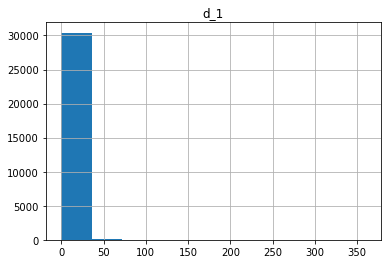

In [12]:
data.hist(column='d_1')

In [27]:
data['Sum_of_d_row'] = data.iloc[:,7:1947].sum(axis = 1) 
print(data)

                                  id        item_id    dept_id   cat_id  \
0      HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES   
1      HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES   
2      HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES   
3      HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES   
4      HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES   
...                              ...            ...        ...      ...   
30485    FOODS_3_823_WI_3_evaluation    FOODS_3_823    FOODS_3    FOODS   
30486    FOODS_3_824_WI_3_evaluation    FOODS_3_824    FOODS_3    FOODS   
30487    FOODS_3_825_WI_3_evaluation    FOODS_3_825    FOODS_3    FOODS   
30488    FOODS_3_826_WI_3_evaluation    FOODS_3_826    FOODS_3    FOODS   
30489    FOODS_3_827_WI_3_evaluation    FOODS_3_827    FOODS_3    FOODS   

      store_id state_id  d_1  d_2  d_3  d_4  ...  d_1933  d_1934  d_1935  \
0         CA_1       CA

In [28]:
(data['Sum_of_d_row']).value_counts()

167      43
269      41
202      39
147      39
216      38
         ..
59981     1
8168      1
17929     1
13663     1
5257      1
Name: Sum_of_d_row, Length: 6760, dtype: int64

In [29]:
data.Sum_of_d_row

0         633
1         500
2         309
3        3337
4        1888
         ... 
30485    1040
30486     728
30487    1734
30488     739
30489    1364
Name: Sum_of_d_row, Length: 30490, dtype: int64

In [25]:
data2 = data[data.columns[7:1947]] 
data2

,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,0,0,0,0,0,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,2,2,0,3,1,4,1,0,0,...,1,0,3,0,1,1,0,0,1,1
30486,0,0,0,0,5,0,1,1,3,1,...,0,0,0,0,0,0,1,0,1,0
30487,6,0,2,2,4,1,8,5,2,7,...,0,0,1,2,0,1,0,1,0,2
30488,0,0,0,0,0,0,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


In [26]:
data2 = data2.sum(axis = 1)
print(data2)

0         633
1         500
2         309
3        3337
4        1888
         ... 
30485    1040
30486     728
30487    1734
30488     739
30489    1364
Length: 30490, dtype: int64


j'ai fait la somme par 2 méthodes pour etre sur !

In [30]:
print(data.sort_values(by=['Sum_of_d_row']))

                                    id          item_id      dept_id  \
6048       FOODS_3_778_CA_2_evaluation      FOODS_3_778      FOODS_3   
26276      FOODS_2_057_WI_2_evaluation      FOODS_2_057      FOODS_2   
27606    HOBBIES_1_170_WI_3_evaluation    HOBBIES_1_170    HOBBIES_1   
20192      FOODS_2_071_TX_3_evaluation      FOODS_2_071      FOODS_2   
935    HOUSEHOLD_1_378_CA_1_evaluation  HOUSEHOLD_1_378  HOUSEHOLD_1   
...                                ...              ...          ...   
2314       FOODS_3_090_CA_1_evaluation      FOODS_3_090      FOODS_3   
8908       FOODS_3_586_CA_3_evaluation      FOODS_3_586      FOODS_3   
21104      FOODS_3_586_TX_3_evaluation      FOODS_3_586      FOODS_3   
18055      FOODS_3_586_TX_2_evaluation      FOODS_3_586      FOODS_3   
8412       FOODS_3_090_CA_3_evaluation      FOODS_3_090      FOODS_3   

          cat_id store_id state_id  d_1  d_2  d_3  d_4  ...  d_1933  d_1934  \
6048       FOODS     CA_2       CA    0    0    0    0  

A ce stade on a pu trier les items selon les ventes dans un ordre croissant pour voir ce qui se vend le moins et ce qui se vend le plus

Donc l'item "FOODS_3_778" est le moins vendu == 0 et l item   "FOODS_3_090" est notre best seller

On pourra penser a diviser notre datasets selon les ventes en 3 categories "les mauvaises", "les moyennes" et les "bonnes" toutes categories confondues (à ce stade)

### Création de sous-ensembles "les mauvais"et "les moyens" et les "bons"

In [42]:
les_mauvais = data[(data['Sum_of_d_row'] > 0) & (data['Sum_of_d_row'] < 1000)]

In [43]:
les_mauvais

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,Sum_of_d_row
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,0,0,0,0,3,3,0,1,633
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,2,1,1,0,0,0,0,0,500
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,2,0,0,0,2,3,0,1,309
6,HOBBIES_1_007_CA_1_evaluation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,1,0,1,1,0,432
10,HOBBIES_1_011_CA_1_evaluation,HOBBIES_1_011,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30475,FOODS_3_813_WI_3_evaluation,FOODS_3_813,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,2,0,2,0,0,0,2,1,183
30477,FOODS_3_815_WI_3_evaluation,FOODS_3_815,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,1,0,0,0,0,0,330
30479,FOODS_3_817_WI_3_evaluation,FOODS_3_817,FOODS_3,FOODS,WI_3,WI,0,1,0,1,...,0,0,1,0,0,0,0,0,1,995
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,1,0,1,0,728


In [44]:
les_moyens = data[(data['Sum_of_d_row'] > 1001) & (data['Sum_of_d_row'] < 5000)]
les_moyens

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,Sum_of_d_row
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,4,0,1,3,0,2,6,3337
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,2,1,0,0,2,1,0,1888
5,HOBBIES_1_006_CA_1_evaluation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,1,0,0,5,2,0,1672
8,HOBBIES_1_009_CA_1_evaluation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,0,0,0,0,0,1,0,2285
9,HOBBIES_1_010_CA_1_evaluation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,0,1,0,2,1,1,0,0,1,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30482,FOODS_3_820_WI_3_evaluation,FOODS_3_820,FOODS_3,FOODS,WI_3,WI,1,1,1,1,...,0,5,1,0,3,3,3,0,1,3001
30483,FOODS_3_821_WI_3_evaluation,FOODS_3_821,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,2,0,2,0,0,1,1,0,4,1262
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,3,0,1,1,0,0,1,1,1040
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,1,2,0,1,0,1,0,2,1734


In [45]:
les_bons = data[(data['Sum_of_d_row'] > 5001) ]
les_bons

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941,Sum_of_d_row
7,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,6,0,15,5,4,1,40,32,14125
14,HOBBIES_1_015_CA_1_evaluation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,4,0,0,5,...,15,0,0,0,0,0,4,5,4,11669
15,HOBBIES_1_016_CA_1_evaluation,HOBBIES_1_016,HOBBIES_1,HOBBIES,CA_1,CA,5,1,3,0,...,6,0,0,0,5,0,7,12,6,10718
18,HOBBIES_1_019_CA_1_evaluation,HOBBIES_1_019,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,4,17,5,0,7,5,5,14,11,9246
29,HOBBIES_1_030_CA_1_evaluation,HOBBIES_1_030,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,11,5,0,0,0,5,17,6,5732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30471,FOODS_3_809_WI_3_evaluation,FOODS_3_809,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,3,4,1,3,2,2,3,5,1,5110
30473,FOODS_3_811_WI_3_evaluation,FOODS_3_811,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,42,21,26,25,21,22,27,27,31,17159
30478,FOODS_3_816_WI_3_evaluation,FOODS_3_816,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,0,4,9,0,0,0,0,0,14469
30481,FOODS_3_819_WI_3_evaluation,FOODS_3_819,FOODS_3,FOODS,WI_3,WI,14,11,5,6,...,1,2,4,1,6,4,4,1,1,5257
